# Imports needed for creating and training a neural network

## References
[Keras](https://keras.io/#getting-started-30-seconds-to-keras)  
[Numpy](https://numpy.org/devdocs/user/quickstart.html)  
[matplotlib](https://matplotlib.org/)  
[pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)  
[gzip](https://docs.python.org/3/library/gzip.html)  


# Importing the training images and labels and refactoring them so they fit the keras model

In [6]:
# Used to create a neural network that will be trained using the MNIST dataset
import keras as kr
# used to Store the bytes files in arrays that can be easily fed into the neural network
import numpy as np
# plotting the data on graphs
import matplotlib.pyplot as plt
# used for storing the dataset in data frames for easier manipulation
import pandas as pd
# used for decompressing the files that contain the MNIST dataset
import gzip
# used for encoding categorical variables
import sklearn.preprocessing as pre

# Decompressing and assigning the training set from MNIST

In [45]:
# Decompresses the test image file found in the data directory, 'rb' refers to reading the file in binary

with gzip.open('data/train-images-idx3-ubyte.gz') as f:
    train_images = f.read()
with gzip.open('data/train-labels-idx1-ubyte.gz') as f:
    train_labels = f.read()
    
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_images = f.read()
with gzip.open('data/t10k-labels-idx1-ubyte.gz') as f:
    test_labels = f.read()
    
# Testing if the file was read correctly should return 'byte'    
# type(train_labels)

# Creates a numpy array out of the training images byte
# allows for the 60000 entries that are in the MNIST dataset as well as reshaping the size of the image to 28 * 28 pixels
# this will be shown on the plots for images below
# "/255.0"  normalizes the imageso the values will be between 0 and 1 because the max of RGB is 255
train_images = ~np.array(list(train_images[16:])).reshape(60000, 28, 28).astype(np.uint8)/255.0
# This var contained the byte values of the labels (single digits)
train_labels =  np.array(list(train_labels[8:])).astype(np.uint8)
# the 16: and 8: refer to the location of the first value of each file, 16: is the beginning of the byte representation for the first image 
# in the MNIST dataset, 8: is the beginning of the byte representation for the first label

# Displaying the images and labels from the datasets
## Verifiying that the images and labels are structured before inputing them into the model 

Value of training label at index 0: 5


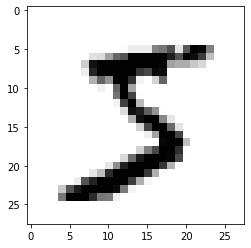

In [8]:
# displaying the training images and labels to show they are accessible
image= train_images[0]
# specialized function for showing images based on np arrays
plt.imshow(image, cmap='gray')
print("Value of training label at index 0:", train_labels[0])

Value of training label at index 59999: 8


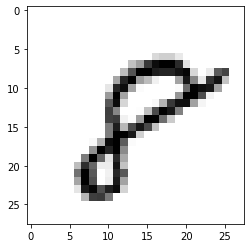

In [9]:
image= train_images[59999]
# specialized function for showing images based on np arrays
plt.imshow(image,cmap='gray')
print("Value of training label at index 59999:", train_labels[59999])

Value of training label at index 25: 1


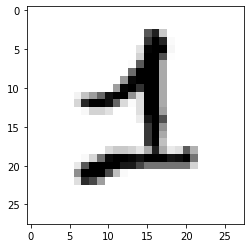

In [33]:
image= train_images[24]
# specialized function for showing images based on np arrays
plt.imshow(image,cmap='gray')
print("Value of training label at index 24:", train_labels[24])

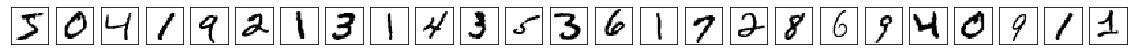

In [35]:
# Plotting the first 25 entries from the training image set
plt.figure(1, figsize=(20,12))
for i in range(25):
    plt.subplot(1,25,i+1)
    plt.imshow(train_images[i], cmap='gray')
    # removing the labels from the graph so the images are not obstructed
    plt.xticks([])
    plt.yticks([])

# Making the Neural Network
[How to start a neural network in keras](https://keras.io/#getting-started-30-seconds-to-keras)  
[Adapted from: https://www.ics.uci.edu/~mohamadt/keras_mnist.html](https://www.ics.uci.edu/~mohamadt/keras_mnist.html)  
[ReLU Activation](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)  
[softamx](https://www.mikulskibartosz.name/understanding-the-softmax-activation-function/)


In [50]:
# Starting the the neural network using models in keras
model = kr.models.Sequential()
# add an initial layer to the neural network 
# this layer gets inputs
model.add(kr.layers.Dense(256, activation='relu', input_shape=(784,)))
# this layer does stuff???
model.add(kr.layers.Dense(units=256, activation="relu"))
# returns the outputs of the model in a human readable form
model.add(kr.layers.Dense(10, activation='softmax'))

C:\Users\Aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


ValueError: Error when checking input: expected dense_4_input to have 2 dimensions, but got array with shape (60000, 28, 28)